In [1]:
%load_ext autoreload
%autoreload 2

import train
import evaluate

In [11]:
params = train.CNNParams(
    embed_size=100,
    dropout=0.5,
    epochs=200,
    filters=[(33, 3), (33, 5), (33, 7)],
    num_layers=1,
    max_norm=3,
)

char_params = train.CharCNNParams(
    dropout=0.5,
    epochs=200,
    max_norm=3,
)

word_results, char_results = evaluate.run(
    params,
    char_params,
    training_sizes=[200],
    window_sizes=[(1, 1)],
    k=10,
    kmeans_path="../clustered_data/15",
    num_clusters=15,
    num_clusters_gmm=18,
    use_cluster_cnn=True,
)

Creating dictionary: 100%|██████████| 17/17 [00:03<00:00,  4.67it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

200 training samples, 1132 testing samples


100%|██████████| 10/10 [09:43<00:00, 58.18s/it]


In [13]:
#%store -r
#%store df

Stored 'df' (DataFrame)


[0.8955282569595179, 0.9132497599857748, 0.9078126352154844, 0.9050328597079761, 0.8946415542700149, 0.8767849894365626, 0.8951242843621708, 0.8885806014885067, 0.9000957398737796, 0.9078277475552325]
[0.8955282569595179, 0.9132497599857748, 0.9078126352154844, 0.9050328597079761, 0.8946415542700149, 0.8767849894365626, 0.8951242843621708, 0.8885806014885067, 0.9000957398737796, 0.9078277475552325]
---
[0.7689823499713312, 0.8231282645053009, 0.7764170844738971, 0.6677961782237094, 0.7998225684465589, 0.7955822693341087, 0.8292760616838524, 0.7970783831686883, 0.7770868191433915, 0.8022568674236686]
[0.7689823499713312, 0.8231282645053009, 0.7764170844738971, 0.6677961782237094, 0.7998225684465589, 0.7955822693341087, 0.8292760616838524, 0.7970783831686883, 0.7770868191433915, 0.8022568674236686]
---
[0.8955282569595179, 0.9132497599857748, 0.9078126352154844, 0.9050328597079761, 0.8946415542700149, 0.8767849894365626, 0.8951242843621708, 0.8885806014885067, 0.9000957398737796, 0.90782

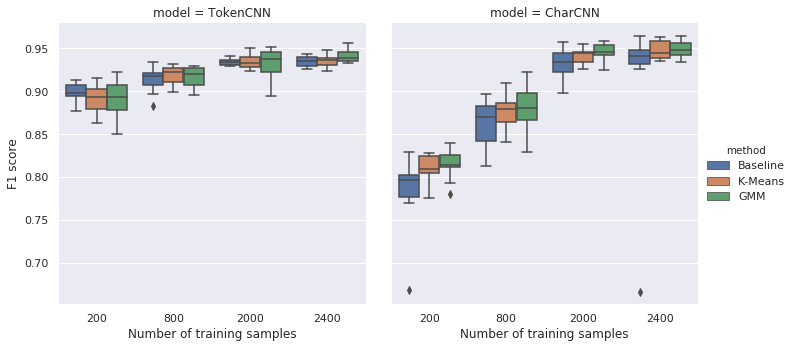

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

def p(s):
    i = s.keys()[0]
    size = df.iloc[i]["size"]
    window = df.iloc[i]["window"]
    method = df.iloc[i]["method"]
    model = df.iloc[i]["model"]

    baseline_scores = df[(df["size"] == size) & (df["model"] == model) & (df["window"] == window) & (df["method"] == "Baseline")].score
    scores = s.tolist()
    if method == "Baseline":
        print(baseline_scores.tolist())
        print(scores)
        print("---")
    return ttest_rel(baseline_scores, scores)[1]

evaluate.plot_sns(df)
print(df.groupby(["size", "model", "method", "window"], sort=False).aggregate([np.mean, np.std, p]))

In [89]:
from scipy.stats import ttest_rel

def sign_test(s):
    i = s.keys()[0]
    size = df.iloc[i]["size"]
    window = df.iloc[i]["window"]
    method = df.iloc[i]["method"]
    model = df.iloc[i]["model"]

    baseline_scores = df[(df["size"] == size) & (df["model"] == model) & (df["window"] == window) & (df["method"] == "Baseline")].score
    scores = s.tolist()
    return ttest_rel(baseline_scores, scores)[1]

print(df.groupby(["size", "model", "method", "window"]).aggregate(fn))

                                  score
size model    method   window          
2000 CharCNN  Baseline 2            NaN
              GMM      2       0.043370
              K-Means  2       0.239364
     TokenCNN Baseline 2            NaN
              GMM      2       0.765942
              K-Means  2       0.823073
2400 CharCNN  Baseline 2            NaN
              GMM      2       0.255173
              K-Means  2       0.272642
     TokenCNN Baseline 2            NaN
              GMM      2       0.100424
              K-Means  2       0.738582
